### Set Up

In [94]:
import pandas as pd
import numpy as np
import plotly as plt
import plotly.express as px

In [129]:
df = pd.read_csv('final_data.csv')

### Data Exploration

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              199 non-null    object 
 1   lyrics             185 non-null    object 
 2   image              185 non-null    object 
 3   contributors       185 non-null    float64
 4   translations       179 non-null    object 
 5   translation_count  185 non-null    float64
 6   verse              185 non-null    float64
 7   refrain            185 non-null    float64
 8   pre-chorus         185 non-null    float64
 9   chorus             185 non-null    float64
 10  post-chorus        185 non-null    float64
 11  bridge             185 non-null    float64
 12  outro              185 non-null    float64
 13  genius_popularity  185 non-null    float64
 14  album              199 non-null    object 
 15  release_date       199 non-null    object 
 16  track_number       199 non

In [131]:
# descriptive statistics
df.describe()

,contributors,translation_count,verse,refrain,pre-chorus,chorus,post-chorus,bridge,outro,genius_popularity,...,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,97.264865,5.432432,2.183784,0.081081,1.016216,2.962162,0.432432,0.913514,0.664865,100.994595,...,0.589246,0.568040,0.003814,0.142107,-7.620482,0.089066,123.898930,0.411565,61.391960,231557.668342
std,53.152264,3.710594,0.530337,0.453152,1.080839,0.366647,0.825561,0.300509,0.473319,60.357855,...,0.116514,0.184777,0.029990,0.079763,2.830810,0.172972,31.410934,0.193124,20.319348,52717.591678
min,18.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,...,0.292000,0.151000,0.000000,0.039100,-15.434000,0.024300,67.303000,0.038200,7.000000,51919.000000
25%,57.000000,2.000000,2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,49.000000,...,0.514000,0.444000,0.000000,0.095750,-9.665000,0.030900,96.961000,0.258000,62.000000,207119.500000
50%,89.000000,5.000000,2.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,99.000000,...,0.598000,0.576000,0.000001,0.115000,-6.938000,0.039400,120.085000,0.410000,68.000000,231000.000000
75%,125.000000,8.000000,2.000000,0.000000,2.000000,3.000000,1.000000,1.000000,1.000000,151.000000,...,0.661000,0.711500,0.000046,0.152000,-5.618500,0.062850,147.921500,0.541000,74.000000,249099.500000
max,332.000000,15.000000,6.000000,3.000000,4.000000,4.000000,3.000000,2.000000,1.000000,220.000000,...,0.897000,0.944000,0.348000,0.594000,-2.445000,0.954000,207.476000,0.943000,87.000000,613026.000000


In [132]:
#define different sets of columns
numeric_columns = list(df.select_dtypes(include=['float64', 'int64']))
string_columns = list(df.select_dtypes(include='object').columns)
date_time_columns = ['release_date']

#### Univariate Analysis

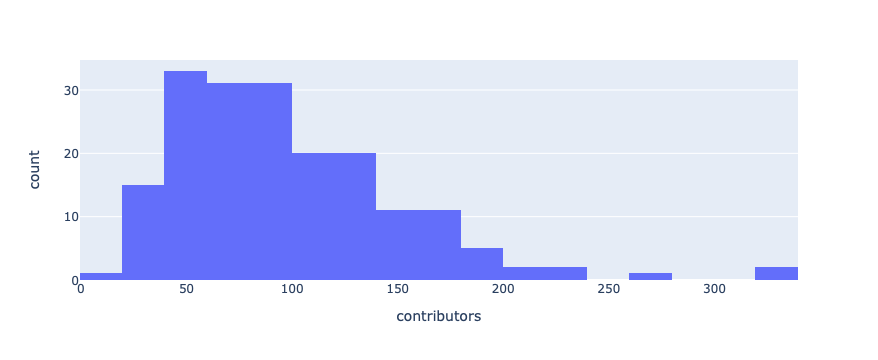

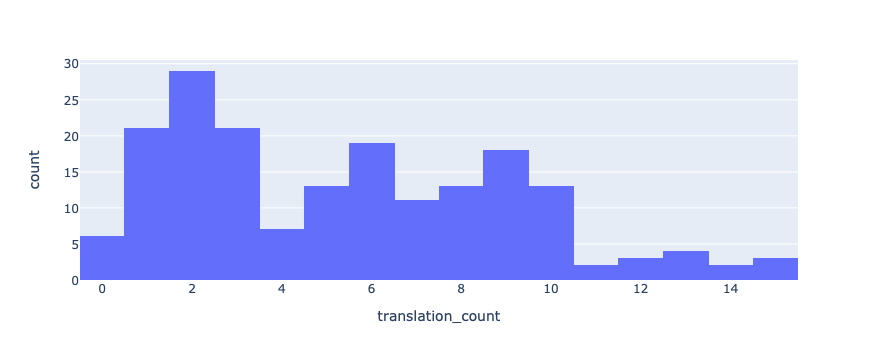

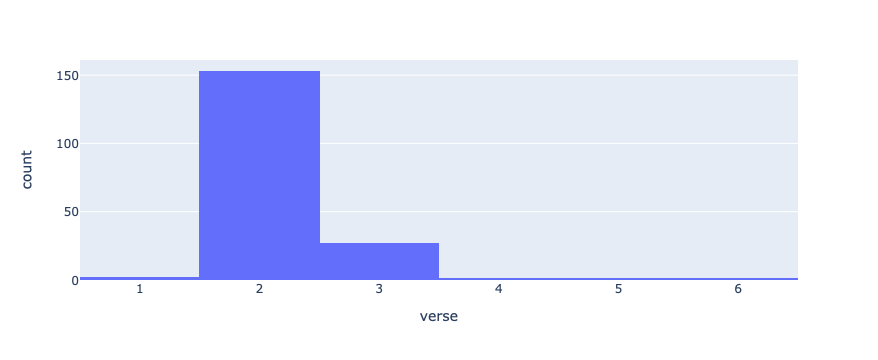

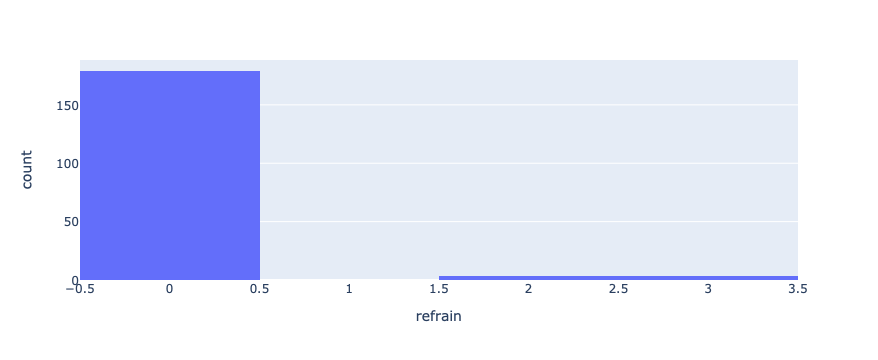

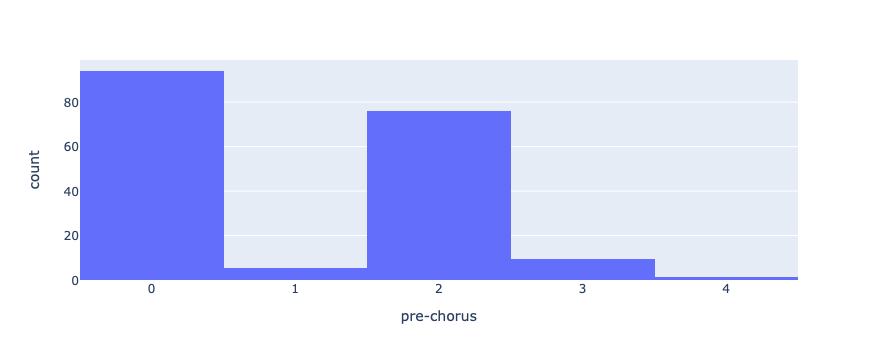

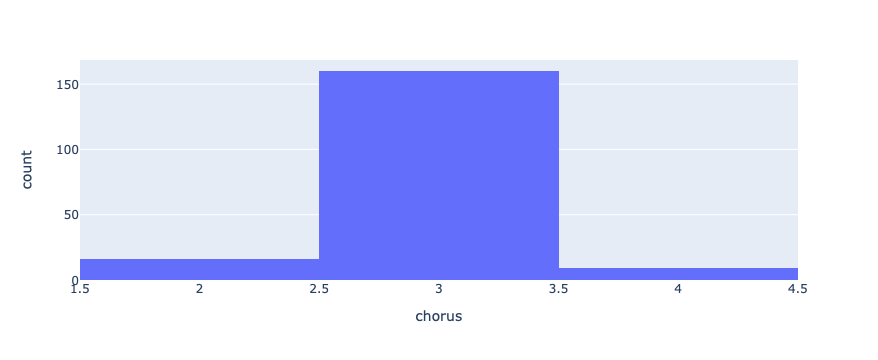

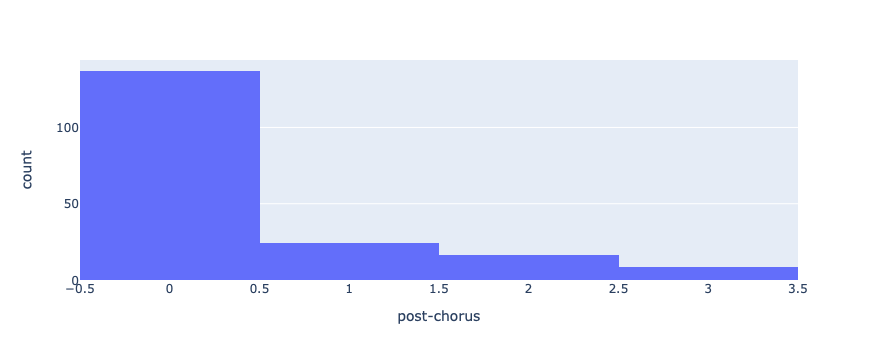

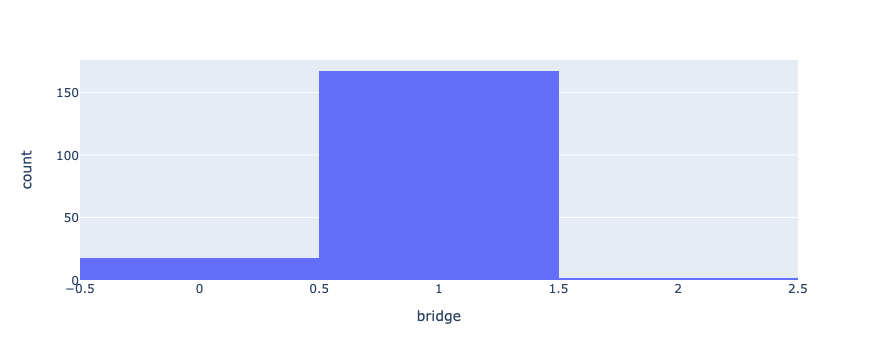

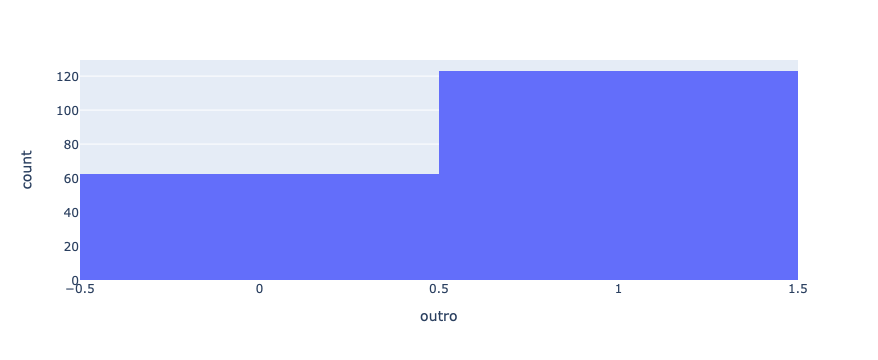

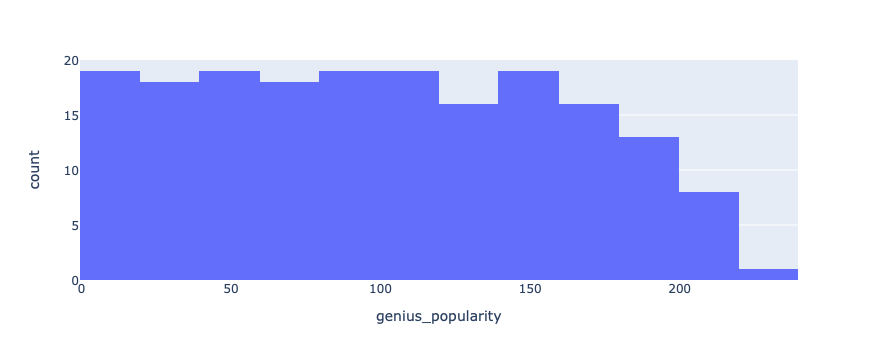

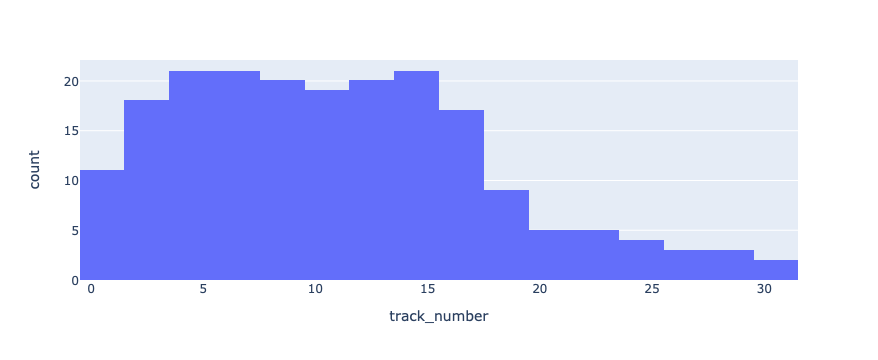

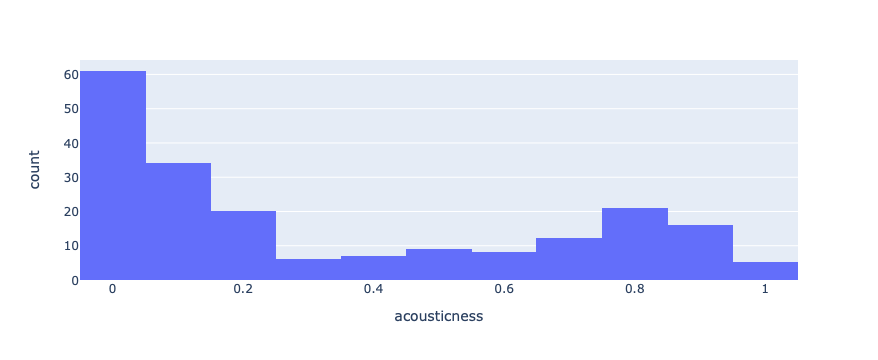

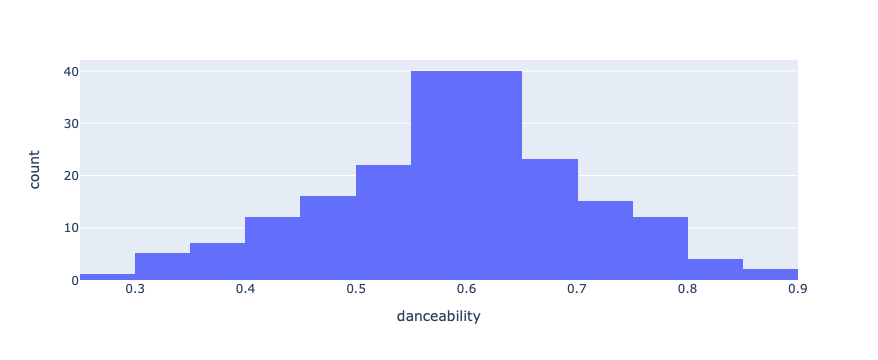

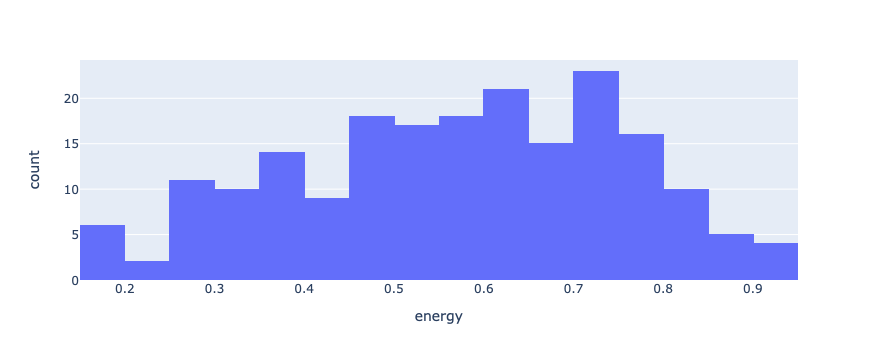

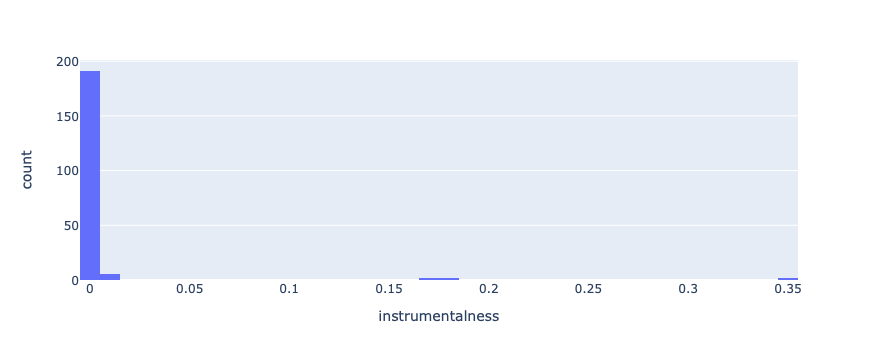

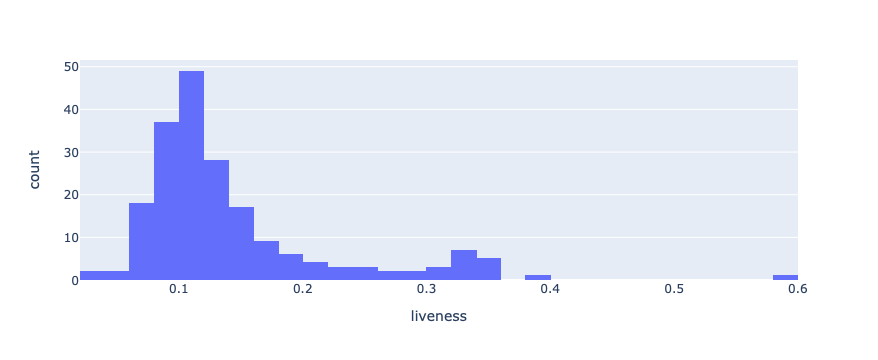

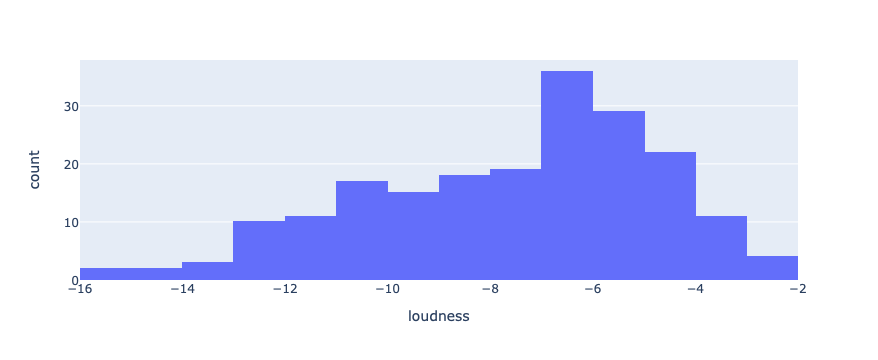

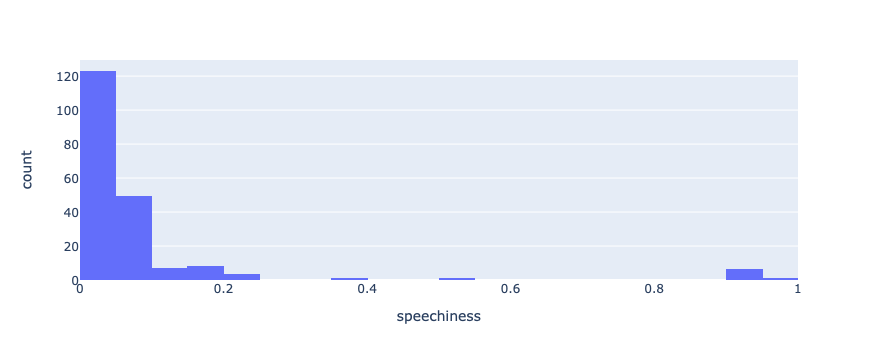

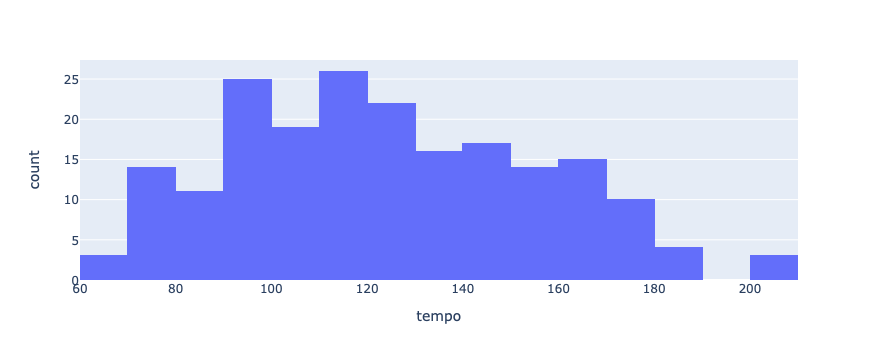

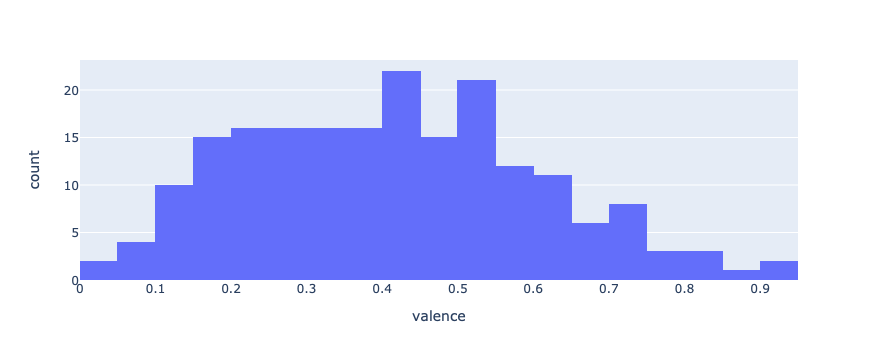

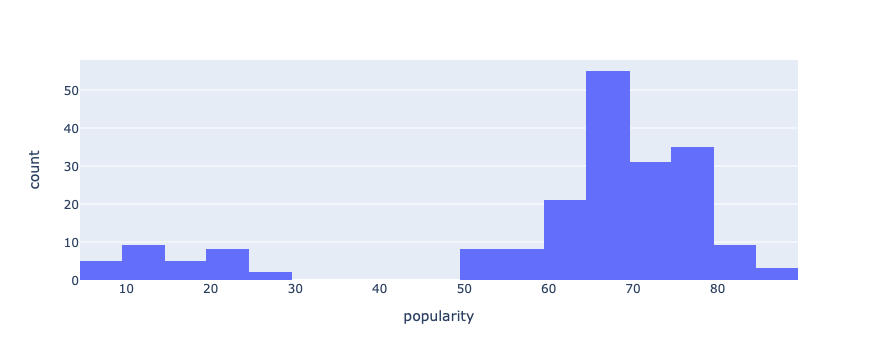

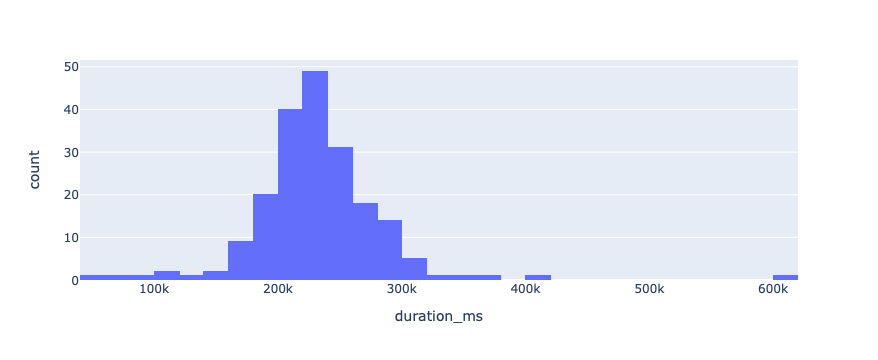

In [125]:
for col in df[numeric_columns]:
    fig = px.histogram(df, x=col)
    fig.show()

In [133]:
#Only one song has 6 verses - all too well
df.loc[df['verse'] >= 5, ['title', 'verse']]

,title,verse
0,all too well (10 minute version),6.0
100,i bet you think about me,5.0


In [134]:
#There are some data errors in track numbers because it is unlikely that an album has over 30 tracks
df.loc[df['track_number'] >= 30, ['album','title', 'track_number']]

,album,title,track_number
0,red,all too well (10 minute version),30.0
193,reputation,radio outro,31.0


All the tracks with high track numbers are from the 'reputation stadium tour surprise song playlist'. Here, I remove this album from the dataset since the normal reputation album is already in it.

In [137]:
#Here we see that Fearless is the album with most tracks (33) 
df.groupby('album')['title'].count().sort_values()

album
taylor swift    11
1989            16
evermore        17
folklore        17
speak now       17
lover           18
midnights       20
reputation      20
red             30
fearless        33
Name: title, dtype: int64

In [138]:
#Viewing the albums with the largest number of songs
df.loc[(df['album'] == 'fearless'), ['album', 'title']].sort_values(by=['album', 'title'])

,album,title
184,fearless,beautiful eyes
157,fearless,breathe
152,fearless,bye bye baby
170,fearless,change
180,fearless,come in with the rain
146,fearless,don’t you
139,fearless,fearless
135,fearless,fifteen
155,fearless,forever & always
161,fearless,hey stephen


In [139]:
# Top 3 songs with most accousticness
df.sort_values(by='acousticness', ascending=False).head(3)['title']

192                new year's day
98     it’s nice to have a friend
63                  sweet nothing
Name: title, dtype: object

In [140]:
# Top 3 danceable songs
df.sort_values(by='danceability', ascending=False).head(3)['title']

83    i think he knows
42      vigilante shit
55     cornelia street
Name: title, dtype: object

In [141]:
# Least danceable songs
df.sort_values(by='danceability', ascending=True).head(3)['title']

52    the archer
2          exile
58     the lakes
Name: title, dtype: object

In [142]:
# Top 3 most poular songs
df.sort_values(by='popularity', ascending=False).head(3)['title']

43    don’t blame me
17      cruel summer
3              lover
Name: title, dtype: object

In [143]:
# Top 3 most least songs
df.sort_values(by='popularity', ascending=True).head(3)['title']

134     innocent
115    last kiss
144      haunted
Name: title, dtype: object

In [144]:
#Top 3 longest songs - shows that all too well - means that the 10 minute version of all too well is not included in the dataset
df.sort_values(by='duration_ms', ascending=False).head(3)['title']

0      all too well (10 minute version)
102                           dear john
115                           last kiss
Name: title, dtype: object

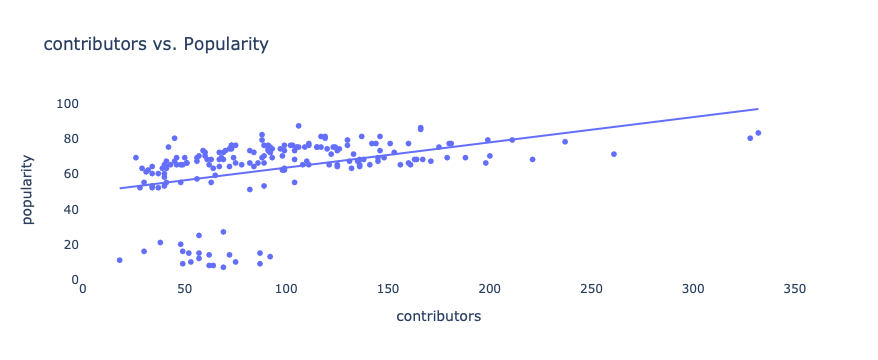

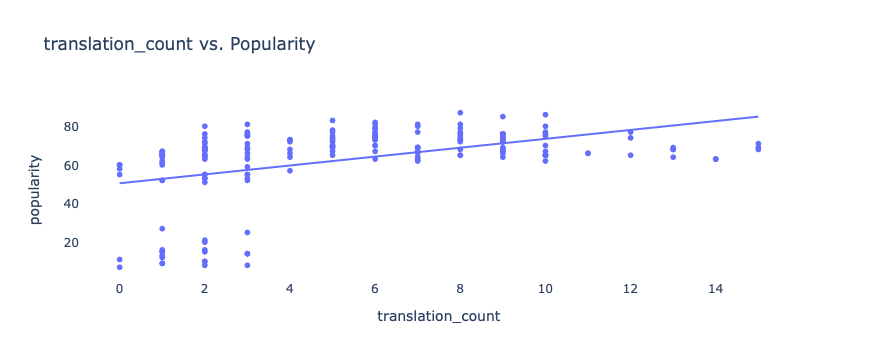

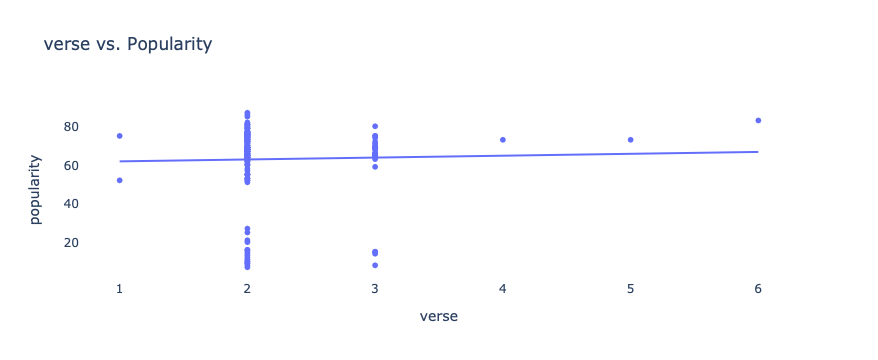

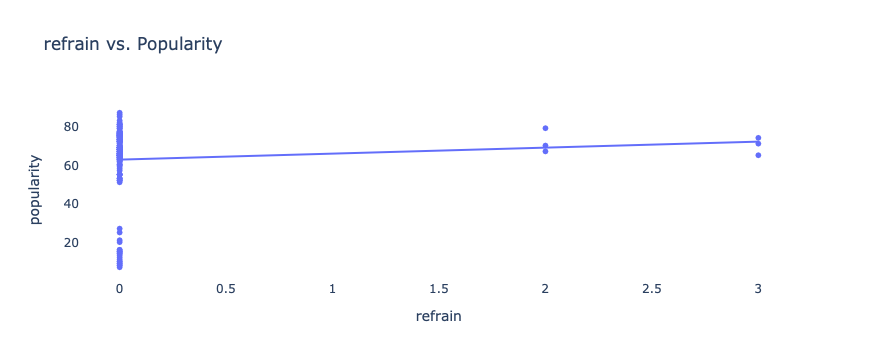

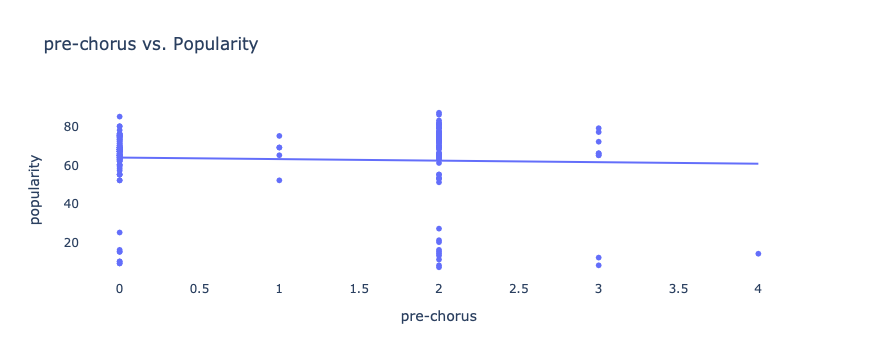

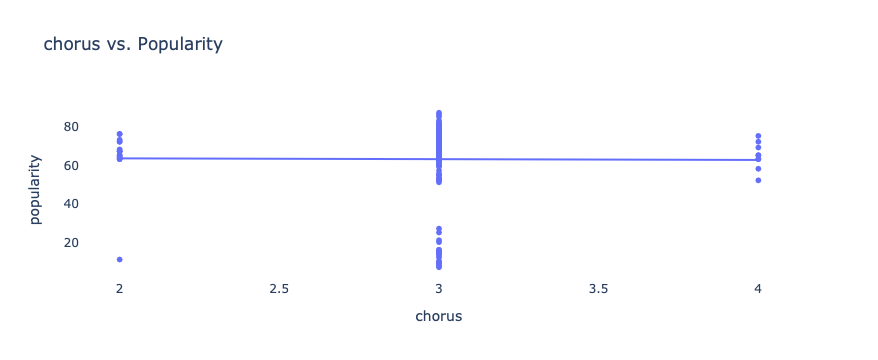

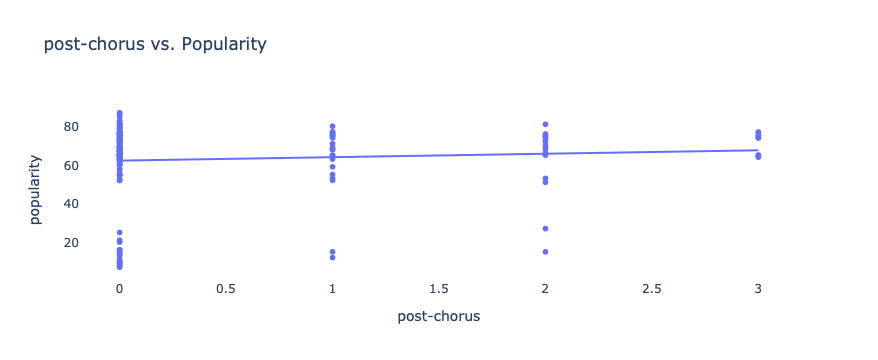

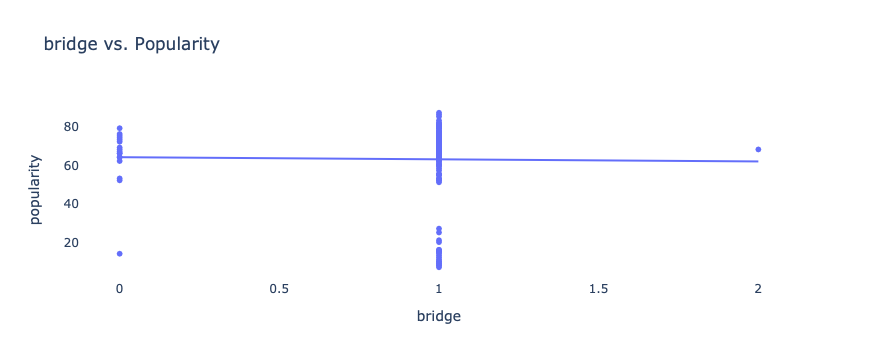

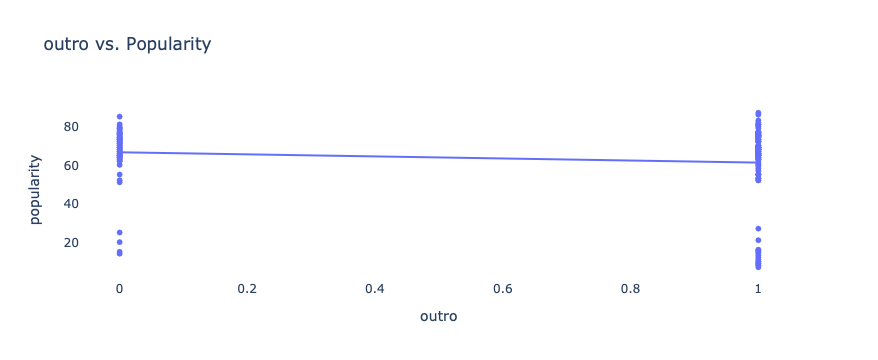

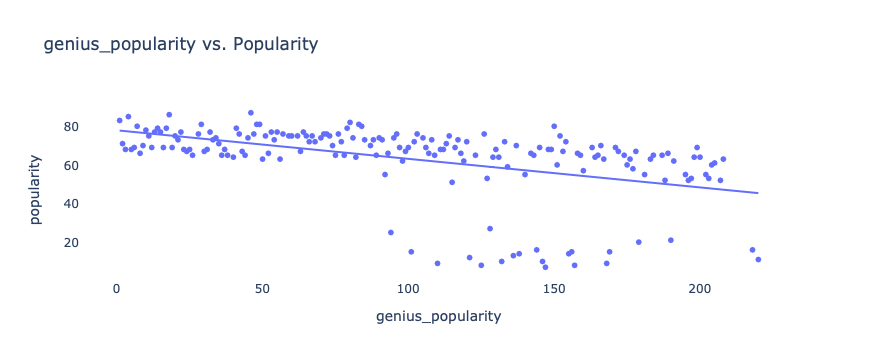

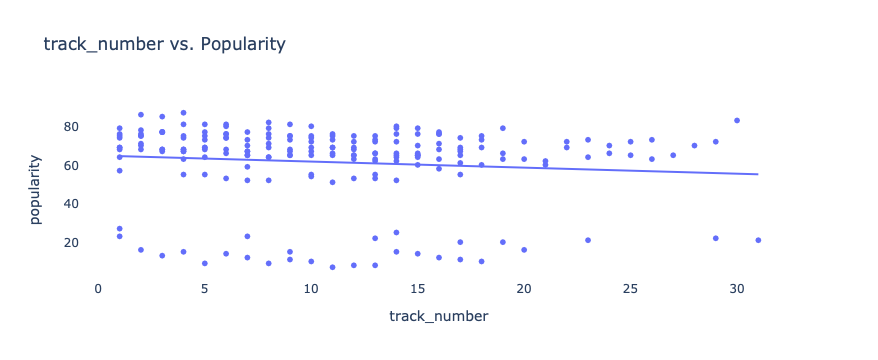

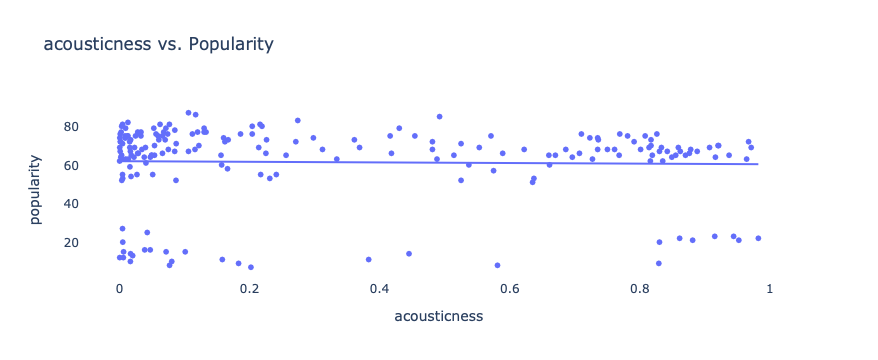

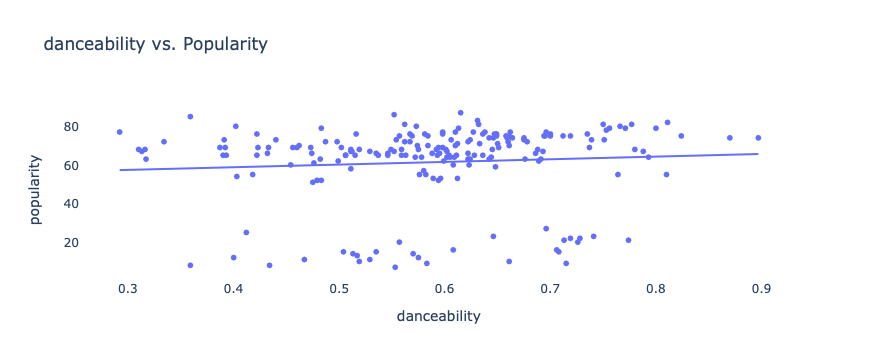

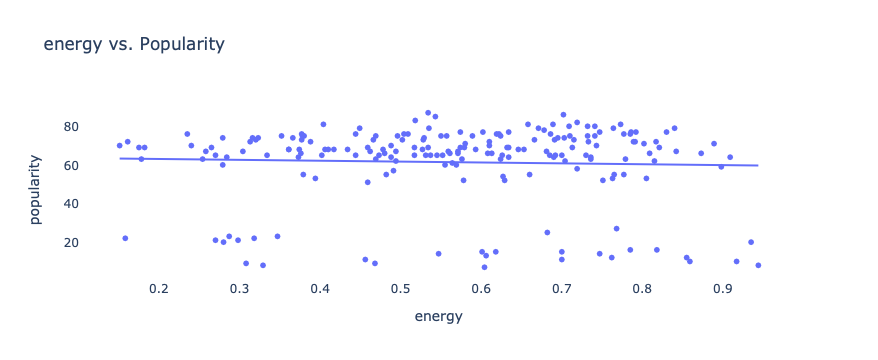

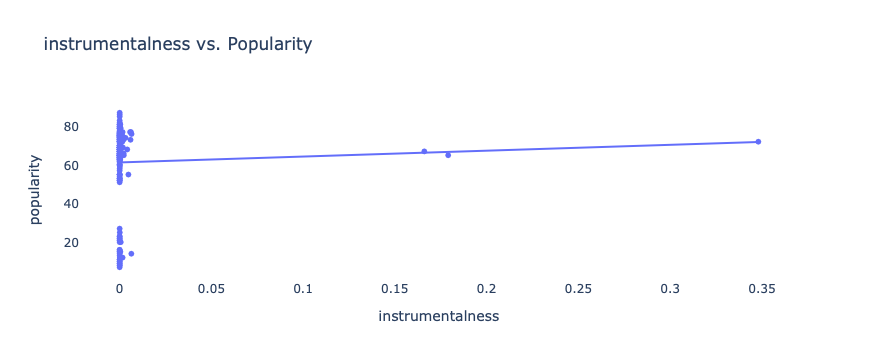

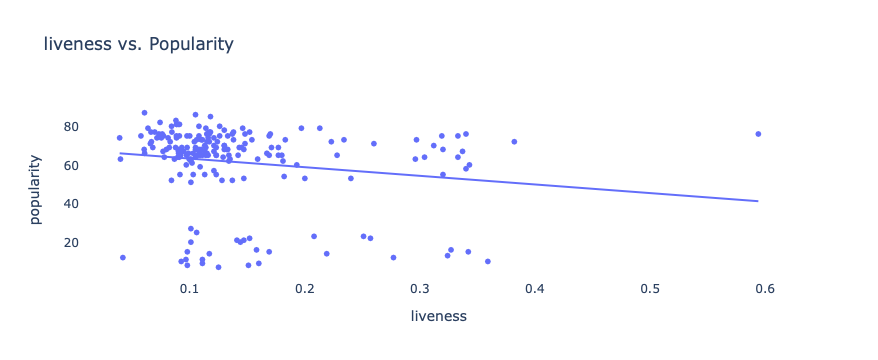

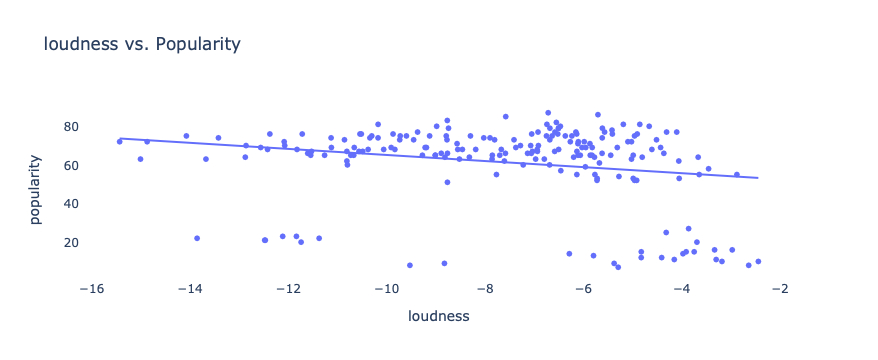

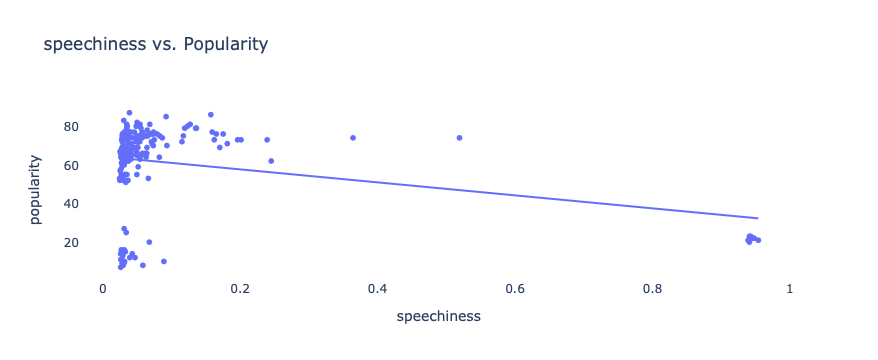

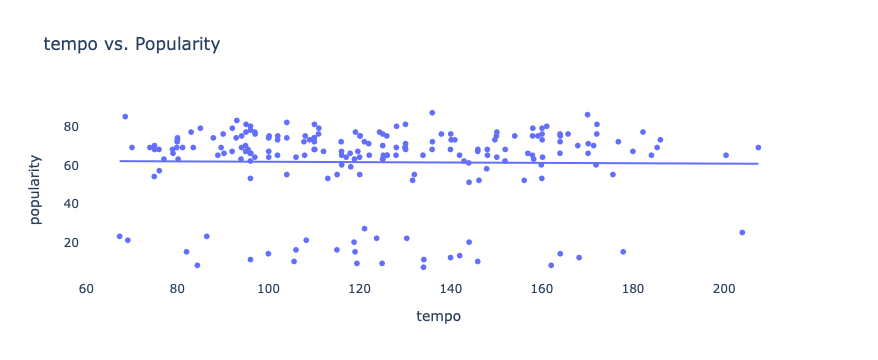

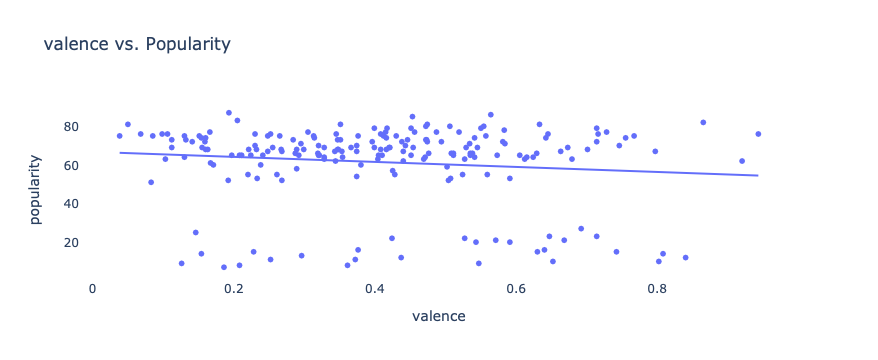

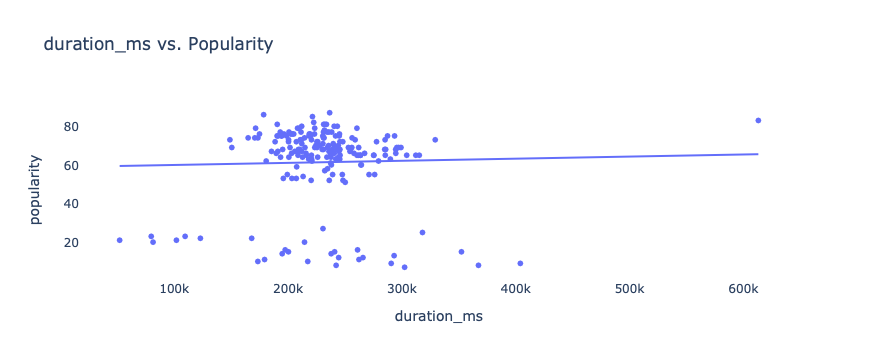

In [145]:
# Create a scatterplot for each column in the dataframe against popularity
for col in df[numeric_columns].drop(columns='popularity'):
    fig = px.scatter(df, x=col, y='popularity', trendline="ols", title=f"{col} vs. Popularity")
    fig.update_layout(
        xaxis=dict(showgrid=False), 
        yaxis=dict(showgrid=False, range=[0, None]),
        plot_bgcolor='rgba(0,0,0,0)'
    )
    
    fig.show()

Key findings:
- Metrics that have a positive relationship with popularity: contributors, translation_count, danceability, speechiness
- Metrics that have a negative relationship with popularity: track_number, liveliness, loudness, duration

In [178]:
# get album cover images
album_covers = {}
for album in df['album'].unique():
    album_covers[album] = df.loc[df['album'] == album, 'image'].head(1)

In [179]:
pd.DataFrame(album_covers)

,red,folklore,lover,reputation,evermore,1989,midnights,fearless,speak now,taylor swift
0,https://images.genius.com/aac8ea3f13ae887a7f1fd9cdd451374e.300x300x1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,https://images.genius.com/06eb9be0620a686ba2c8f981fdd741c0.300x300x1.png,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,https://images.genius.com/960edcb36156c3aed9cb70ede250780a.300x300x1.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,https://images.genius.com/01c5bf888fa73a6b25fb2dee1b4035ff.300x300x1.png,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,https://images.genius.com/3e354c719fe236ab4a75adc6ea4c7fca.300x300x1.png,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,https://images.genius.com/d022400aad4680759c278a348d5aaa9b.300x300x1.png,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,https://images.genius.com/311cb920325262f491c29daa9413176b.300x300x1.jpg,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://images.genius.com/c8b4619c8f69a4660a99f5ee3a904989.300x300x1.jpg,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://images.genius.com/d04f0a5d76810e4bc7c6d5f8e261bd91.300x300x1.jpg,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://images.genius.com/5d882614c1902d9f4ed44847dac82537.300x300x1.jpg


In [172]:
pd.set_option('display.max_colwidth', None)

In [187]:
df.loc[df['album'] == 'fearless', 'image'].head(1).to_string(index=False)

'https://images.genius.com/c8b4619c8f69a4660a99f5ee3a904989.300x300x1.jpg'

In [185]:
type(a)

str

In [199]:
df.loc[df['title'] == 'all too well', 'lyrics'].to_string()

20    \ni walked through the door with you, the air was cold\nbut something 'bout it felt like home somehow\nand i left my scarf there at your sister's house\nand you've still got it in your drawer, even now\n\n\noh, your sweet disposition and my wide-eyed gaze\nwe're singing in the car, getting lost upstate\nautumn leaves falling down like pieces into place\nand i can picture it after all these days\n\nand i know it's long gone and\nthat magic's not here no more\nand i might be okay, but i'm not fine at all\noh, oh, oh\n\n\n'cause there we are again on that little town street\nyou almost ran the red 'cause you were lookin' over at me\nwind in my hair, i was there\ni remember it all too well\n\n\nphoto album on the counter, your cheeks were turning red\nyou used to be a little kid with glasses in a twin-sized bed\nand your mother's telling stories 'bout you on the tee-ball team\nyou taught me 'bout your past, thinking your future was me\n\n\nand i know it's long gone and\nthere was not